In [1]:
import numpy as np
import starry

starry.config.lazy = False

In [2]:
def create_star():
    star = starry.Primary(starry.Map(deg=0, udeg=2, amp=1.0), m=1.0, r=1.0, prot=1.0)
    star.map[1] = 0.40
    star.map[2] = 0.26
    return star

def create_planet():
    planet = starry.Secondary(starry.Map(ydeg=5, amp=5e-3), m=0, 
                        r=0.1,
                        porb=1.0,
                        prot=1.0,
                        Omega=30,
                        ecc=0.3,
                        w=30,
                        t0=0,
                         )
    return planet

def create_system(star, planet):
    system = starry.System(star, planet)
    return system

def create_time_array():
    time = np.linspace(-0.25, 3.25, 10000)
    # time = np.linspace(-0.25, 1.00, 4)
    return time

def calculate_system_light_curve(system, time_array):
    x, ay = system.flux(time_array)
    return x, ay

def calculate_sp_light_curve(system, time_array):
    flux_star, flux_planet = system.flux(time_array, total=False)
    return flux_star, flux_planet

def main():
    star = create_star()
    planet = create_planet()
    system = create_system(star, planet)
    times = create_time_array()
    x, ay = calculate_system_light_curve(system, times)
    return x, ay

In [5]:
x, ay = main()

Compiling `set_vector`...

sleep:  set_vector


 Done.
Pre-computing some matrices... Done.


sleep:  set_vector
dotr value:  <bound method PyCapsule.dotR of <starry._c_ops.Ops object at 0x7f5497985870>>


Compiling `X`...

sleep:  X
oblate false
es call: LD_X
reflected false
es call: LD_X


 Done.


X [[ 1.00000000e+00  1.00000000e+00  6.40987562e-17 ...  2.60012009e-16
  -8.11440028e-32 -4.89276055e-16]
 [ 1.00000000e+00  1.00000000e+00  6.39577817e-17 ...  2.59995385e-16
  -2.91448744e-18 -4.89270987e-16]
 [ 1.00000000e+00  1.00000000e+00  6.38168079e-17 ...  2.59945517e-16
  -5.82878453e-18 -4.89255785e-16]
 ...
 [ 1.00000000e+00  1.00000000e+00  6.38168079e-17 ... -2.59945517e-16
  -5.82878453e-18  4.89255785e-16]
 [ 1.00000000e+00  1.00000000e+00  6.39577817e-17 ... -2.59995385e-16
  -2.91448744e-18  4.89270987e-16]
 [ 1.00000000e+00  1.00000000e+00  6.40987562e-17 ... -2.60012009e-16
   1.29912431e-30  4.89276055e-16]] (10000, 37)
system:  (10000, 37) (37,) (10000,)
[1.    0.005 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ]
[ 1.00000000e+00  1.00000000e+00  6.40987562e-17  7.07050159e-17
  1.15470054e+00  5.92879582e-1

In [6]:
import matplotlib.pyplot as plt

In [8]:
sflux = np.dot(x, ay)

In [9]:
time = np.linspace(-0.25, 3.25, 10000)

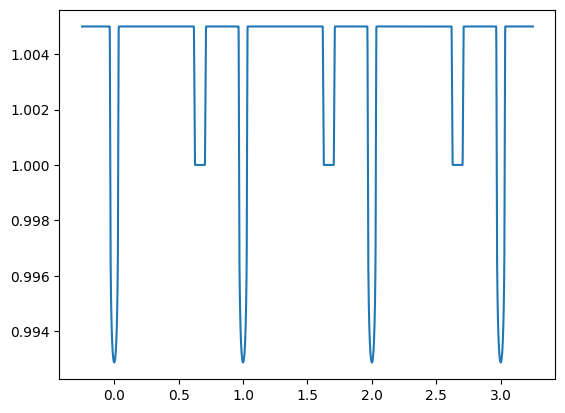

In [11]:
plt.plot(time, sflux)

In [13]:
x[:,0].shape

(10000,)

In [15]:
inds = [np.array([0]), np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])]

In [17]:
res = []
for i, idx in enumerate(inds):
    print(i, idx)

0 [0]
1 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


In [33]:
x[:,1:].shape

(10000, 36)

In [21]:
sf = np.dot(x[:,[0]], ay[0])

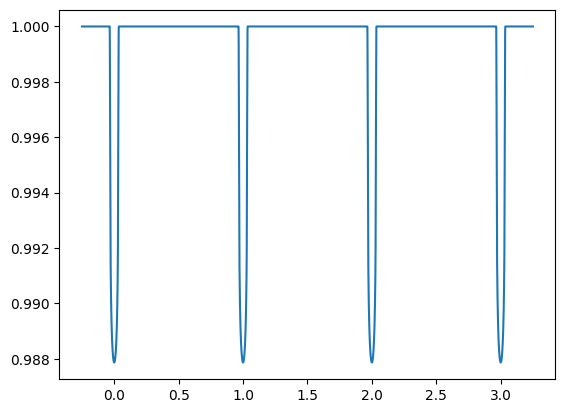

In [23]:
plt.plot(time, sf)

In [36]:
sp = np.dot(x[:,1:], ay[1:])

In [37]:
ay[1]

0.005

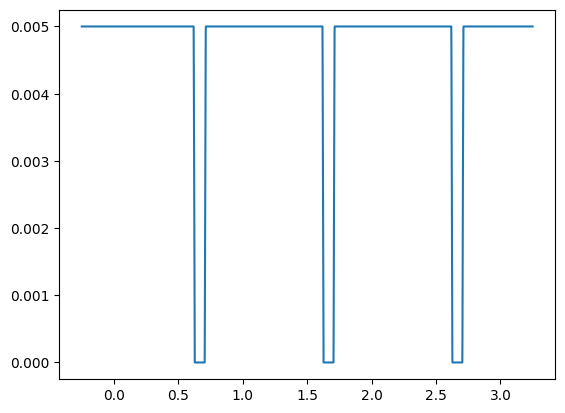

In [38]:
plt.plot(time, sp)

In [45]:
test = sf.flatten() + sp

In [44]:
sf.flatten().shape

(10000,)

In [46]:
test.shape

(10000,)

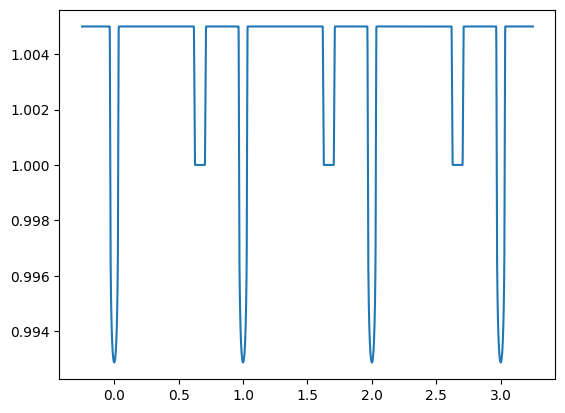

In [48]:
plt.plot(time, test)

In [49]:
sflux.shape

(10000,)

In [50]:
(sflux - test).max()

0.0